# Analyze Product Sentiment

In [1]:
import turicreate
import pandas as pd

# Read product review data

In [2]:
products = turicreate.SFrame('../input/amazon_baby.sframe')
products_pd = pd.read_csv('../input/amazon_baby.csv')

# Explore data

In [3]:
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [4]:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending=False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


In [5]:
# pandas way
products_pd.groupby("name")

In [6]:
products_pd["name"].value_counts().head()

Vulli Sophie the Giraffe Teether                                            785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                         562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision    561
Baby Einstein Take Along Tunes                                              547
Cloud b Twilight Constellation Night Light, Turtle                          520
Name: name, dtype: int64

# Examine the reivews for the most-reviewed product

In [7]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [8]:
giraffe_reviews.head()

name,review,rating
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0


In [9]:
len(giraffe_reviews)

785

In [10]:
giraffe_reviews['rating'].show()
# this graphs are great from turicreate 

Materializing SArray

In [11]:
# PANDAS
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
giraffe_reviews_pd = products_pd[products_pd['name']=='Vulli Sophie the Giraffe Teether']
len(giraffe_reviews_pd)

785

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe81926bc90>]],
      dtype=object)

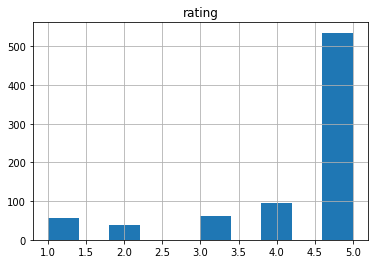

In [15]:
giraffe_reviews_pd.hist()

# Building a sentiment classifier

## Build word count vectors

In [ ]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [ ]:
products.head(3)

In [ ]:
sdfasdfas

# Define what is positive and negative sentiment

In [ ]:
products['rating'].show()

In [ ]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [ ]:
#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = products['rating'] >= 4

In [ ]:
products

In [ ]:
products['sentiment'].show()

# Train our sentiment classifier

In [ ]:
train_data,test_data = products.random_split(.8,seed=0)

In [ ]:
sentiment_model = turicreate.logistic_classifier.create(train_data,target='sentiment', features=['word_count'], validation_set=test_data)

# Apply the sentiment classifier to better understand the Giraffe reviews

In [ ]:
products['predicted_sentiment'] = sentiment_model.predict(products, output_type = 'probability')

In [ ]:
products

In [ ]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [ ]:
giraffe_reviews

# Sort the Giraffe reviews according to predicted sentiment

In [ ]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [ ]:
giraffe_reviews

In [ ]:
giraffe_reviews.tail()

## Show the most positive reviews

In [ ]:
giraffe_reviews[0]['review']

In [ ]:
giraffe_reviews[1]['review']

# Most negative reivews

In [ ]:
giraffe_reviews[-1]['review']

In [ ]:
giraffe_reviews[-2]['review']